In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/neuro-kup/kaggle_test_alpha.csv
/kaggle/input/neuro-kup/kaggle_train_alpha.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [20]:
train_data = pd.read_csv("/kaggle/input/neuro-kup/kaggle_train_alpha.csv")
test_data = pd.read_csv("/kaggle/input/neuro-kup/kaggle_test_alpha.csv")

In [21]:
train_data.head()

,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
0,133959,20203,ADMINISTRACIÓN EN SALUD OCUPACIONAL,LIMA,Entre 850 y menos de 2000 soles,Entre 11 y 20 horas,Nivel D,No,Primaria incompleta,Si,Si,N,Si,No,No,Primaria incompleta,medio-bajo
1,784510,20212,ADMINISTRACION DE EMPRESAS,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,Si,Si,Si,Primaria incompleta,medio-alto
2,535024,20183,INGENIERIA AMBIENTAL Y SANITARIA,CAJAMARCA,Entre 850 y menos de 2000 soles,Menos de 10 horas,Nivel D,No,Primaria completa,Si,No,N,No,Si,No,Primaria completa,medio-alto
3,591650,20212,CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,No,Si,Si,Primaria completa,medio-bajo
4,635933,20195,CONTADURIA PUBLICA,PIURA,Entre 2000 y menos de 3500 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto


In [22]:
test_data.head()

,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE
0,345759,20195,ADMINISTRACION POLICIAL,LIMA,Entre 2000 y menos de 3500 soles,Entre 21 y 30 horas,Nivel D,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Educación profesional completa
1,925052,20195,MEDICINA,PUCALLPA,Entre 850 y menos de 2000 soles,0,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
2,383355,20212,CONTADURIA PUBLICA,LIMA,Entre 3500 y menos de 4800 soles,Más de 30 horas,Nivel B,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Primaria completa
3,70065,20183,LICENCIATURA EN IDIOMAS EXTRANJEROS,TRUJILLO,Entre 600 y menos de 850 soles,Entre 21 y 30 horas,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
4,8675,20195,LICENCIATURA EN MATEMATICAS,MOQUEGUA,Menos de 600 soles,0,Nivel E,No,Ninguno,No,No,N,No,No,No,Ninguno


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554000 entries, 0 to 553999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        554000 non-null  int64 
 1   PERIODO_RESULTADOS            554000 non-null  int64 
 2   CARRERA_PROFESIONAL           554000 non-null  object
 3   CIUDAD                        554000 non-null  object
 4   COSTO_MATRÍCULA_SOLES         548957 non-null  object
 5   HORAS_SEMANALES_TRABAJO       529330 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  528330 non-null  object
 7   CUENTA_CON_INTERNET           532749 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         535448 non-null  object
 9   CUENTA_CON_LAVADORA           522281 non-null  object
 10  TIENE_CARRO                   519221 non-null  object
 11  ANTECEDENTES_PENALES          554000 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  548782 non-null  object
 13 

In [24]:

unique_classes_count = train_data.nunique()

print("Número de clases únicas por columna:")
print(unique_classes_count)

Número de clases únicas por columna:
CÓDIGO                          554000
PERIODO_RESULTADOS                   9
CARRERA_PROFESIONAL                941
CIUDAD                              31
COSTO_MATRÍCULA_SOLES                8
HORAS_SEMANALES_TRABAJO              5
NIVEL_SOCIECONÓMICO_VIVIENDA         6
CUENTA_CON_INTERNET                  2
NIVEL_EDUCATIVO_PADRE               12
CUENTA_CON_LAVADORA                  2
TIENE_CARRO                          2
ANTECEDENTES_PENALES                 2
PAGÓ_MATRÍCULA_POR_SU_CUENTA         2
CUENTA_CON_ORDENADOR                 2
CUENTA_CON_INTERNET.1                2
NIVEL_EDUCATIVO_MADRE               12
RENDIMIENTO_ACADÉMICO                4
dtype: int64


In [25]:
train_data.isnull().sum()

CÓDIGO                              0
PERIODO_RESULTADOS                  0
CARRERA_PROFESIONAL                 0
CIUDAD                              0
COSTO_MATRÍCULA_SOLES            5043
HORAS_SEMANALES_TRABAJO         24670
NIVEL_SOCIECONÓMICO_VIVIENDA    25670
CUENTA_CON_INTERNET             21251
NIVEL_EDUCATIVO_PADRE           18552
CUENTA_CON_LAVADORA             31719
TIENE_CARRO                     34779
ANTECEDENTES_PENALES                0
PAGÓ_MATRÍCULA_POR_SU_CUENTA     5218
CUENTA_CON_ORDENADOR            30375
CUENTA_CON_INTERNET.1           21251
NIVEL_EDUCATIVO_MADRE           18928
RENDIMIENTO_ACADÉMICO               0
dtype: int64

<Axes: >

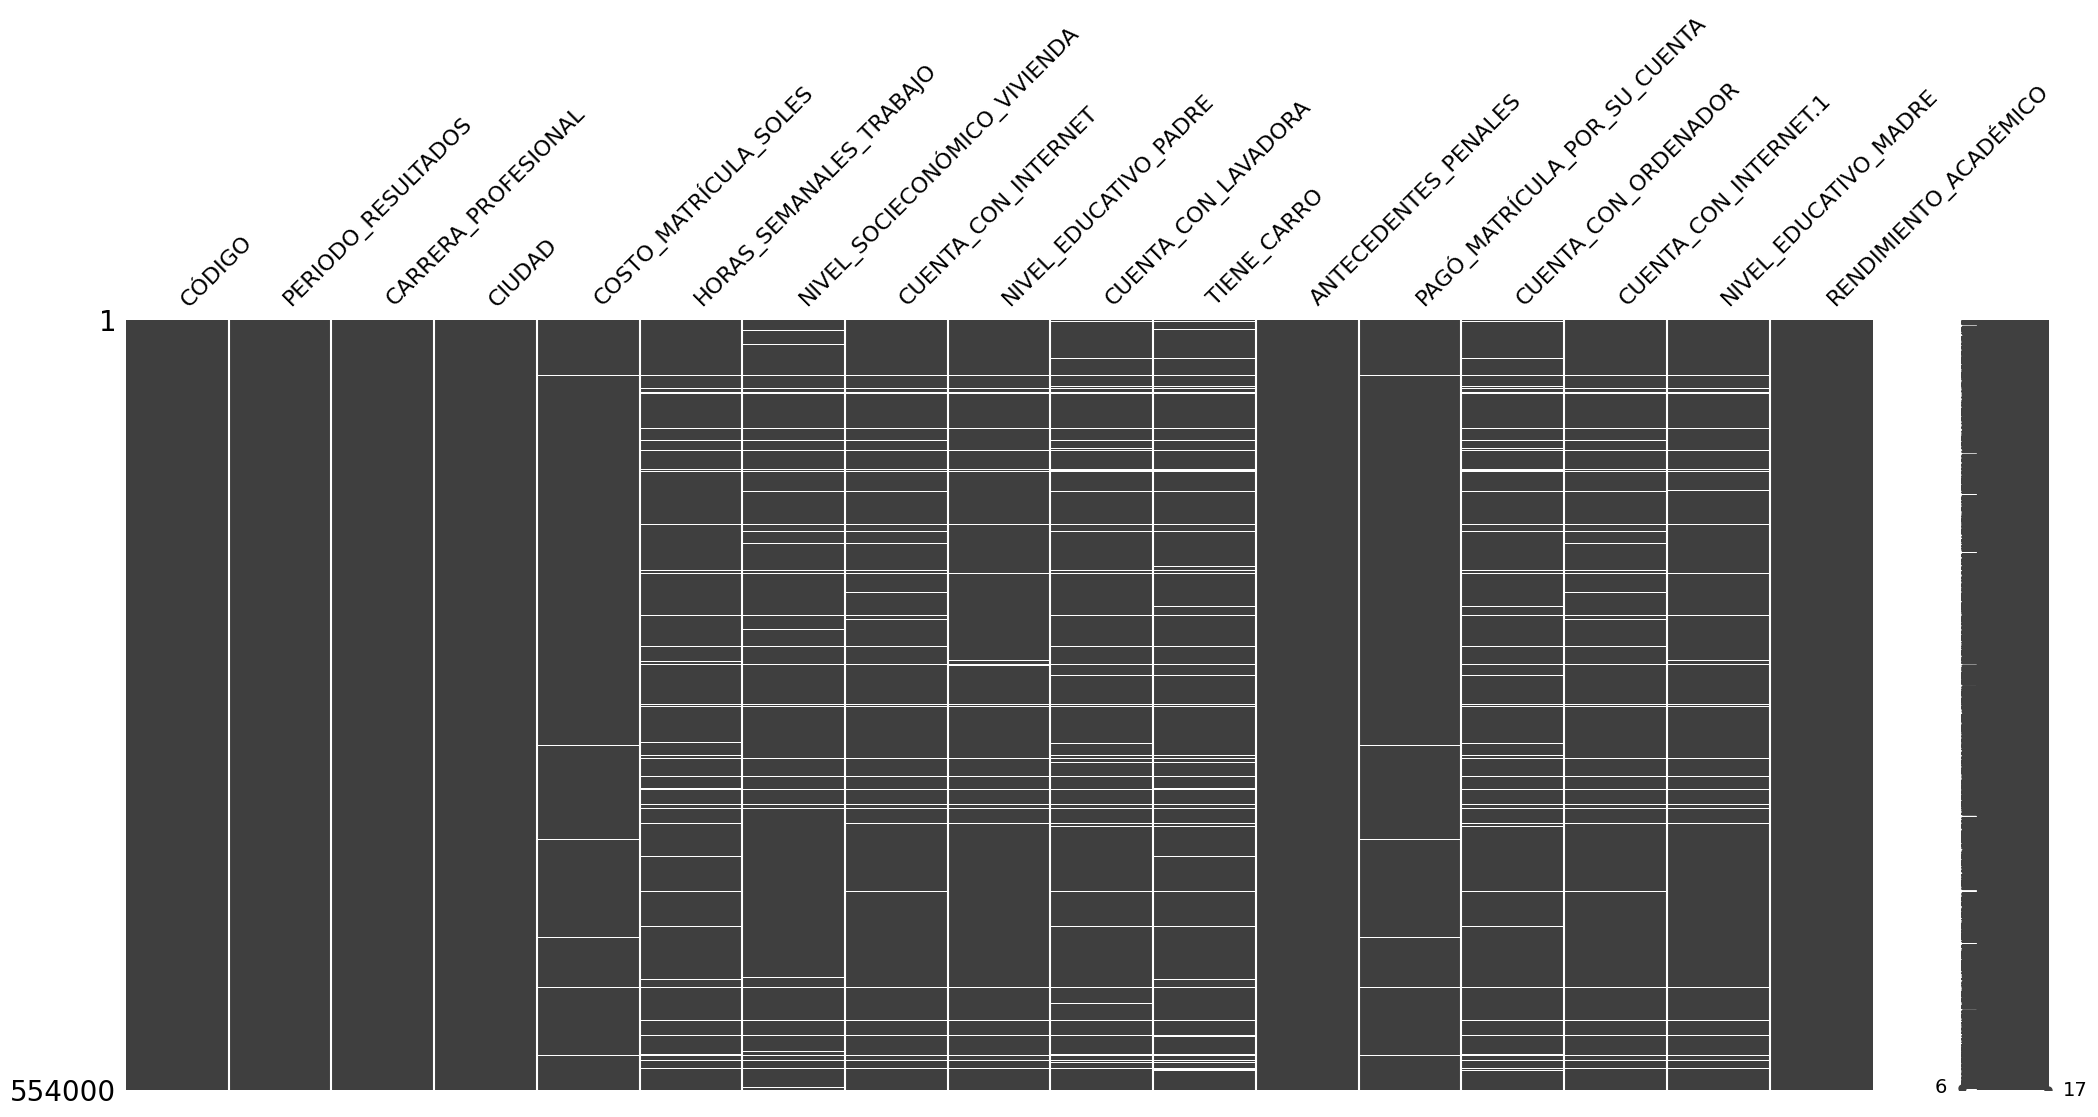

In [26]:
msno.matrix(train_data)

In [27]:
test_data.isnull().sum()

CÓDIGO                             0
PERIODO_RESULTADOS                 0
CARRERA_PROFESIONAL                0
CIUDAD                             0
COSTO_MATRÍCULA_SOLES           1244
HORAS_SEMANALES_TRABAJO         6187
NIVEL_SOCIECONÓMICO_VIVIENDA    6467
CUENTA_CON_INTERNET             5378
NIVEL_EDUCATIVO_PADRE           4626
CUENTA_CON_LAVADORA             8054
TIENE_CARRO                     8844
ANTECEDENTES_PENALES               0
PAGÓ_MATRÍCULA_POR_SU_CUENTA    1280
CUENTA_CON_ORDENADOR            7728
CUENTA_CON_INTERNET.1           5378
NIVEL_EDUCATIVO_MADRE           4736
dtype: int64

<Axes: >

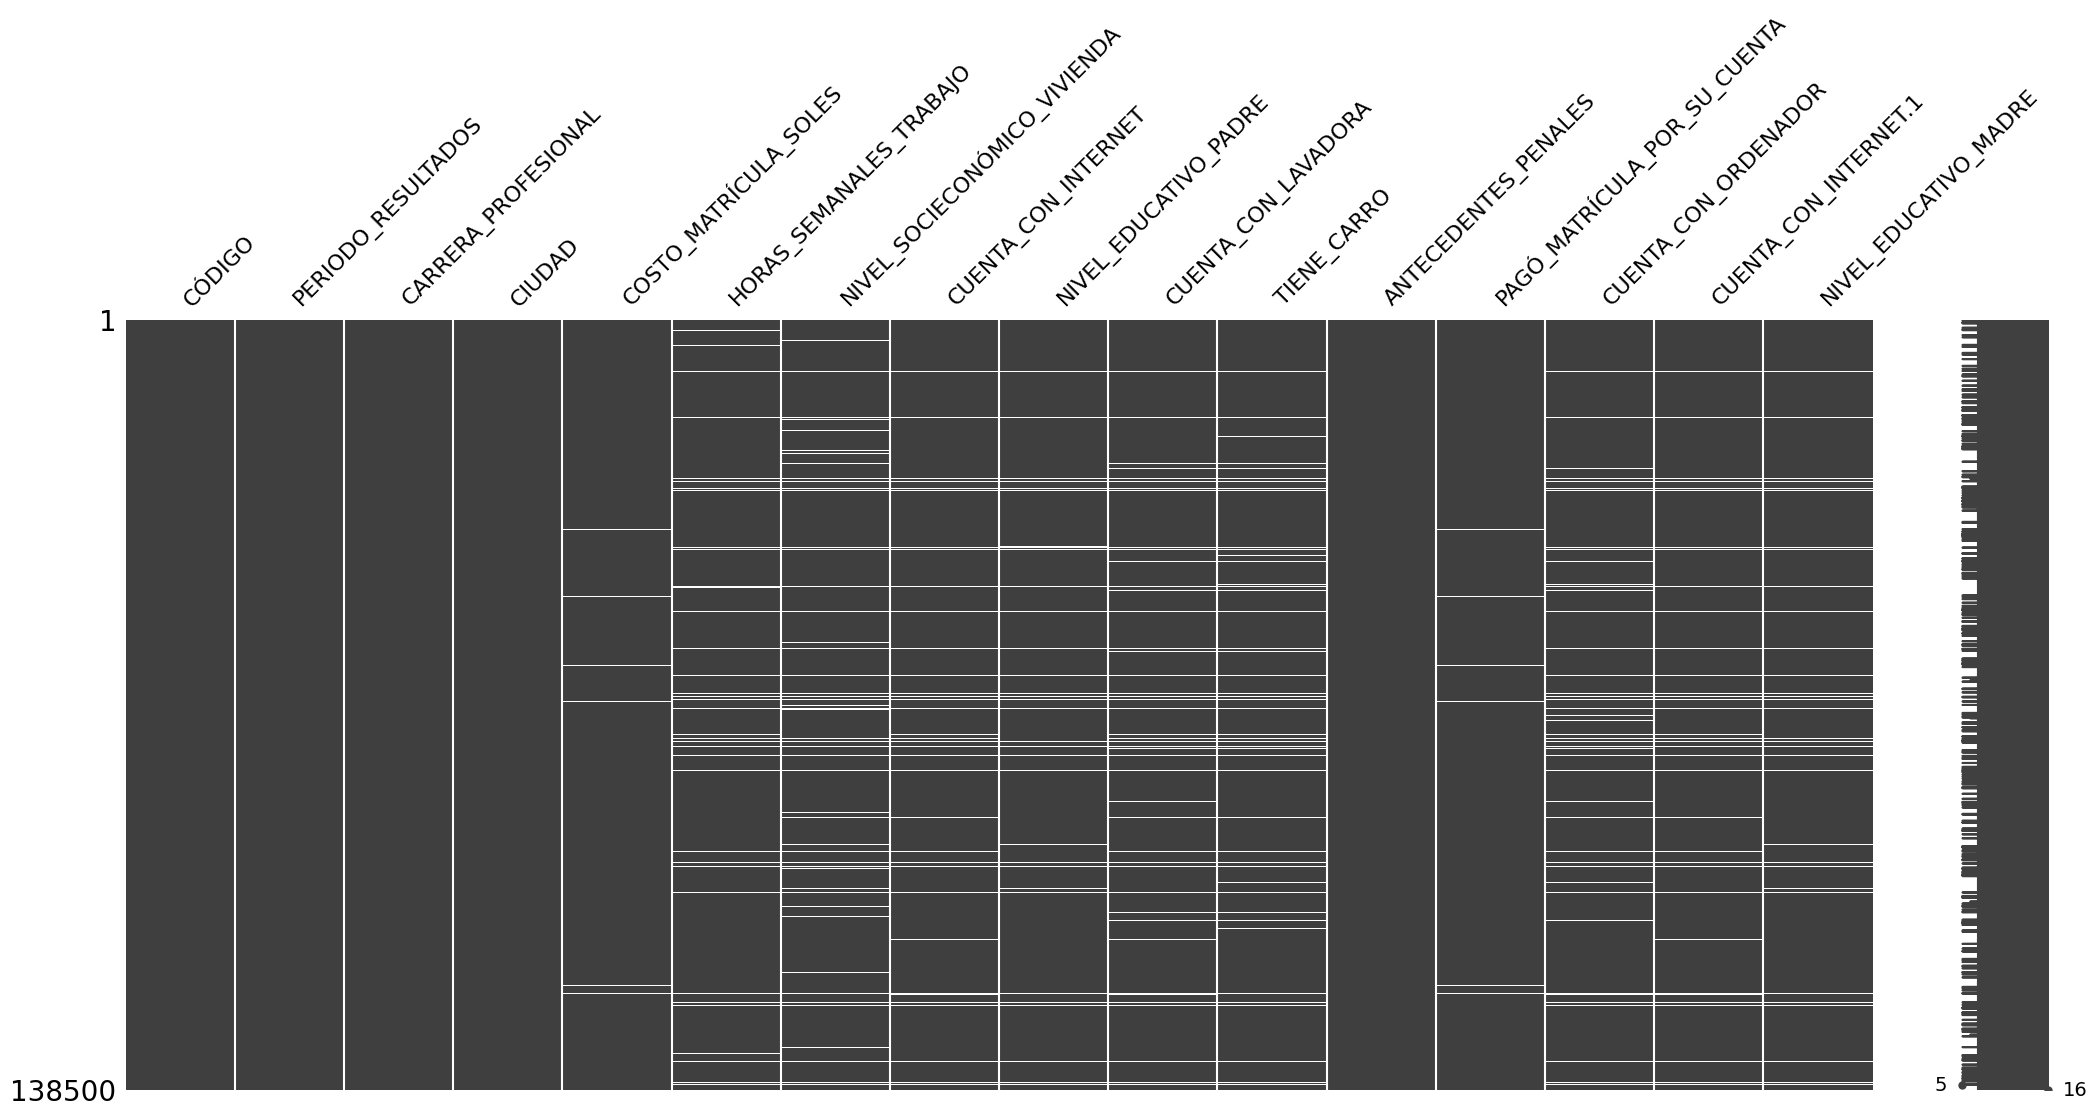

In [28]:
msno.matrix(test_data)

In [29]:
def preprocesar_datos(df):
    # Separar características y target
    X = df.drop(['RENDIMIENTO_ACADÉMICO', 'CÓDIGO', 'ANTECEDENTES_PENALES', 'CUENTA_CON_LAVADORA', 'CUENTA_CON_INTERNET.1'], axis=1)
    y = df['RENDIMIENTO_ACADÉMICO']
    
    # Identificar columnas
    columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
    columnas_categoricas = X.select_dtypes(include=['object']).columns
    
    # Pipeline de Preprocesamiento
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), columnas_numericas),
            
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='Desconocido')),
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), columnas_categoricas)
        ])
    
    # Codificar variable objetivo
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = to_categorical(y_encoded)
    
    # Ajustar y transformar
    X_procesado = preprocessor.fit_transform(X)
    
    return X_procesado, y_categorical, label_encoder, preprocessor


In [30]:
from tensorflow.keras import Input

def crear_modelo(input_shape, num_clases):
    modelo = Sequential([
        Input(shape=(input_shape,)),  
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(num_clases, activation='softmax')
    ])
    
    modelo.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return modelo

In [31]:
# Entrenamiento del modelo
def entrenar_modelo(X, y):
    # Divisiones estratificadas (usamos todo train_data como entrenamiento)
    X_train = X
    y_train = y
    
    # Configurar callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5, 
        min_lr=0.00001
    )
    
    # Crear y entrenar modelo
    modelo = crear_modelo(X.shape[1], y.shape[1])
    
    historia = modelo.fit(
        X_train, y_train, 
        epochs=15, 
        batch_size=64,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    return modelo, historia

In [32]:
import joblib
import numpy as np

def main():
    # Preprocesamiento
    X_train, y_categorical, label_encoder, preprocessor = preprocesar_datos(train_data)
    
    # Entrenamiento del modelo
    modelo, historia = entrenar_modelo(X_train, y_categorical)
    
    # Guardar el modelo entrenado en un archivo .pkl
    joblib.dump(modelo, 'wileth.pkl')
    
    # Preprocesar los datos de test_data (sin la columna de target)
    X_test = test_data.drop(['CÓDIGO', 'ANTECEDENTES_PENALES', 'CUENTA_CON_LAVADORA', 'CUENTA_CON_INTERNET.1'], axis=1)
    X_test_procesado = preprocessor.transform(X_test)
    
    # Hacer predicciones sobre el set de test
    test_predictions = modelo.predict(X_test_procesado)
    test_predictions_encoded = np.argmax(test_predictions, axis=1)
    
    # Revertir las predicciones codificadas a las etiquetas originales
    test_predictions_final = label_encoder.inverse_transform(test_predictions_encoded)
    
    # Crear la salida con los códigos de test y las predicciones
    submission = test_data[['CÓDIGO']].copy()
    submission['RENDIMIENTO_ACADÉMICO'] = test_predictions_final
    
    # Guardar el archivo de solución
    submission.to_csv('wileth_solucion1.csv', index=False)
    
    # Imprimir las primeras filas del resultado
    print(submission.head())

# Ejecutar análisis
if __name__ == "__main__":
    main()


Epoch 1/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.3903 - loss: 1.2943 - learning_rate: 0.0010
Epoch 2/15
   8/8657 ━━━━━━━━━━━━━━━━━━━━ 1:05 8ms/step - accuracy: 0.4679 - loss: 1.1780  

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


8657/8657 ━━━━━━━━━━━━━━━━━━━━ 66s 8ms/step - accuracy: 0.4286 - loss: 1.2118 - learning_rate: 0.0010
Epoch 3/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 75s 9ms/step - accuracy: 0.4346 - loss: 1.2029 - learning_rate: 0.0010
Epoch 4/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 68s 8ms/step - accuracy: 0.4371 - loss: 1.1986 - learning_rate: 0.0010
Epoch 5/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 68s 8ms/step - accuracy: 0.4379 - loss: 1.1967 - learning_rate: 0.0010
Epoch 6/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.4400 - loss: 1.1931 - learning_rate: 0.0010
Epoch 7/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.4412 - loss: 1.1915 - learning_rate: 0.0010
Epoch 8/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 69s 8ms/step - accuracy: 0.4414 - loss: 1.1910 - learning_rate: 0.0010
Epoch 9/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 69s 8ms/step - accuracy: 0.4433 - loss: 1.1866 - learning_rate: 0.0010
Epoch 10/15
8657/8657 ━━━━━━━━━━━━━━━━━━━━ 68s 8ms/step - accuracy: 0.4458 - loss: 1.1854 - learning_rate: 